In [1]:
import os
import re
import glob
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import get_decay_delay, plot_bars_with_scatter, sample_v_traces

## Effects of injection duration

In [2]:
pickle_list = glob.glob('test_dataset/Duration_LC14_21001_results_injection*.pkl')
# to summarize the results, construct a dataframe with the following columns:
# neuron_id, stim_duration, Ra, cm, g_pas, injected_current, stim_start, max_decay_ratio, peak_time, width_change, min_max_distance, max_distance
summary_df = pd.DataFrame(columns=['neuron_id', 'stim_duration', 'Ra', 'cm', 'g_pas', 'injected_current', 'stim_start', 'max_decay_ratio', 'peak_time', 'width_change', 'min_max_distance', 'max_distance'])
for i, pickle_file in enumerate(pickle_list):
    # get the neuron_id from the pickle_file by regular expression
    neuron_id = re.search(r'LC14_(\d+)', pickle_file).group(1)
    neuron_id = int(neuron_id)
    df_entry = {'neuron_id': neuron_id}
    with open(pickle_file, 'rb') as f:
        data = pickle.load(f)
        simu_config = data['simu_config']
        df_entry.update(simu_config)
    df_entry.update(get_decay_delay(pickle_file))
    # for all the fields in summary_df, if the value is in df_entry, then add it to the summary_df
    for key, value in df_entry.items():
        if key in summary_df.columns:
            summary_df.loc[i, key] = value

In [ ]:
sample_v_traces(pickle_list[0], max_trace_overlay=True, trace_idx=0.5, xlim=(0, 200))
pickle_list[0]

In [6]:
# drop Ra, cm, g_pas, injected_current, stim_start from the summary_df
summary_df_reduced = summary_df.drop(columns=['Ra', 'cm', 'g_pas', 'injected_current', 'stim_start'])
# group by neuron_id and stim_duration, and aggregate the rest to a list
summary_df_reduced = summary_df_reduced.groupby(['neuron_id', 'stim_duration']).agg(list).reset_index()

In [ ]:
# bar plot of the summary_df, x axis is stim_duration, y axis is max_decay_ratio
plot_bars_with_scatter(df=summary_df_reduced, x_col='stim_duration', y_col='max_decay_ratio')


## Effects of electrical properties 

In [36]:
pickle_list = glob.glob('test_dataset/RC_LC14_21001_results_injection*.pkl')
# to summarize the results, construct a dataframe with the following columns:
# neuron_id, stim_duration, Ra, cm, g_pas, injected_current, stim_start, max_decay_ratio, peak_time, width_change, min_max_distance, max_distance
summary_df = pd.DataFrame(columns=['neuron_id', 'stim_duration', 'Ra', 'cm', 'g_pas', 'injected_current', 'stim_start', 'max_decay_ratio', 'peak_time', 'width_change', 'min_max_distance', 'max_distance'])
for i, pickle_file in enumerate(pickle_list):
    # get the neuron_id from the pickle_file by regular expression
    neuron_id = re.search(r'LC14_(\d+)', pickle_file).group(1)
    neuron_id = int(neuron_id)
    df_entry = {'neuron_id': neuron_id}
    with open(pickle_file, 'rb') as f:
        data = pickle.load(f)
        simu_config = data['simu_config']
        df_entry.update(simu_config)
    df_entry.update(get_decay_delay(pickle_file))
    # for all the fields in summary_df, if the value is in df_entry, then add it to the summary_df
    for key, value in df_entry.items():
        if key in summary_df.columns:
            summary_df.loc[i, key] = value

In [37]:
# apply the lambda x: np.log(x) to the max_decay_ratio column
summary_df['max_decay_ratio'] = summary_df['max_decay_ratio'].apply(lambda x: np.log(x))

# apply a function to the max_decay_ratio column, and the function is multiplying the value by the Ra and g_pas columns
summary_df['normlized_max_decay_ratio'] = summary_df['max_decay_ratio'] / ( summary_df['Ra'] * summary_df['g_pas'] )
summary_df['character_length'] = 1. / (summary_df['Ra'] * summary_df['g_pas'])

In [38]:
# drop Ra, cm, g_pas, injected_current, stim_start from the summary_df
summary_df_reduced = summary_df.drop(columns=['stim_duration', 'injected_current', 'stim_start'])
# group by neuron_id and stim_duration, and aggregate the rest to a list
#summary_df_reduced = summary_df_reduced.groupby(['neuron_id', 'Ra', 'cm', 'g_pas']).agg(list).reset_index()
summary_df_reduced = summary_df_reduced.groupby(['neuron_id', 'character_length', 'cm']).agg(list).reset_index()

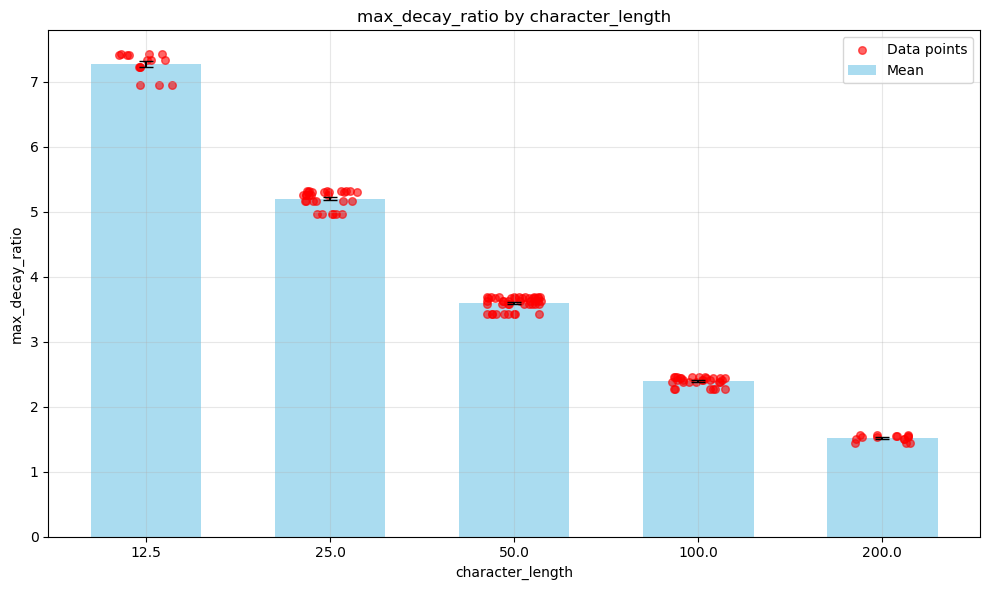

In [41]:
plot_bars_with_scatter(df=summary_df_reduced, x_col='character_length', y_col='max_decay_ratio')


In [31]:
Ra_list = [100, 200, 400]
g_pas_list = [0.05, 0.1, 0.2]
product_list = [Ra * g_pas for Ra in Ra_list for g_pas in g_pas_list]
product_types = set(product_list)

In [32]:
product_types

{5.0, 10.0, 20.0, 40.0, 80.0}